# Conteúdo

   1. [Desafio](#pblm)
   2. [Pacotes](#pkg)
   3. [Tratando variáveis Categóricas](#categ)
       * Profissão dos Usuários

<a id='pblm'></a>
## 1. Desafio

O desafio aqui é encontrar um agrupamento dos usuários que sejá capaz manter a homogeneidade dentro dos grupos e a heterogeneidade fora deles. Foi disponibilizado um dataset contendo 11 variáveis, 7 numéricas e 4 categóricas.

<a id='pkg'></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

np.random.seed(42)

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from sklearn.cluster import KMeans
%matplotlib inline

plotly.tools.set_credentials_file(username='filipewds', api_key='hBPPTQn7k69934NOlsrU')

In [2]:
df = pd.read_excel(".\\Dataset - Code Challenge Data Scientist.xlsx", sheet_name="Dados")
print("O dataset possui", '{0:,}'.format(df.shape[0]), "linhas e",df.shape[1],"colunas.")
print("\nCabeçalho dos dados:")
df.head()

O dataset possui 4,972 linhas e 11 colunas.

Cabeçalho dos dados:


,ID,GEO_REFERENCIA,DATA_NASCIMENTO,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL
0,1,780,1992-08-15,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.857143,342.857143,428.571429,28.571429,A
1,2,35,1990-02-24,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),942.857143,0.000000,0.000000,0.000000,A
2,3,54,1987-07-17,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),2000.000000,0.000000,0.000000,2857.142857,A
3,4,35,1988-04-27,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),857.142857,285.714286,0.000000,1428.571429,A
4,5,883,1971-12-10,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),8615.385714,0.000000,0.000000,47471.788571,A


In [3]:
df.describe()

,ID,GEO_REFERENCIA,VALOR_01,VALOR_02,VALOR_03,VALOR_04
count,4972.0000,4972.000000,4972.000000,4.972000e+03,4.972000e+03,4972.000000
mean,2486.5000,336.807522,2022.698192,1.863806e+04,4.246265e+03,5041.123332
std,1435.4371,300.711983,6098.823138,8.918084e+04,3.764594e+04,23246.036503
min,1.0000,10.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1243.7500,70.000000,628.571429,0.000000e+00,0.000000e+00,0.000000
50%,2486.5000,224.000000,1371.428571,0.000000e+00,0.000000e+00,0.000000
75%,3729.2500,607.000000,2571.428571,6.005771e+03,0.000000e+00,1428.571429
max,4972.0000,999.000000,400000.000000,2.857143e+06,1.428571e+06,685714.285714


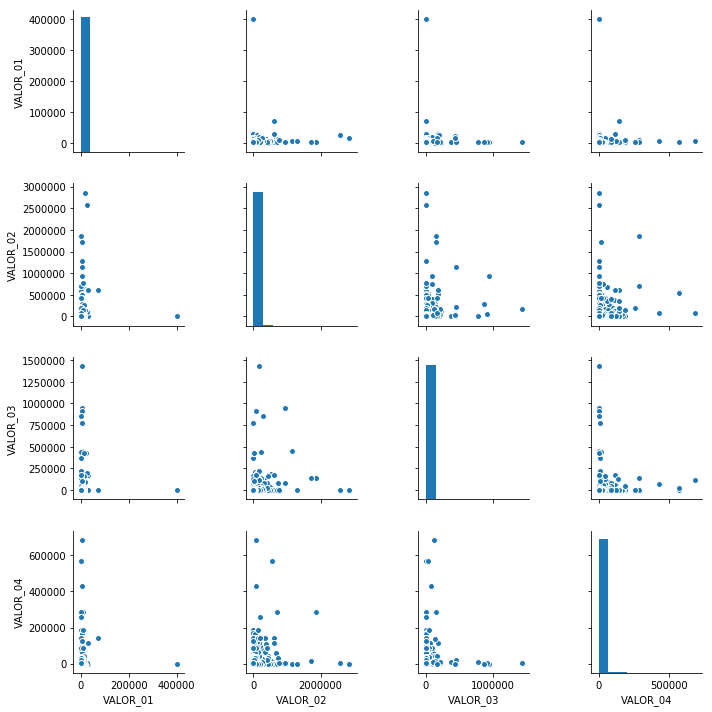

In [4]:
cols_vals = [var for var in df.columns.values if "VALOR" in var.upper()]
df_num = df[cols_vals];
sns.pairplot(df_num)
plt.tight_layout()
plt.show()

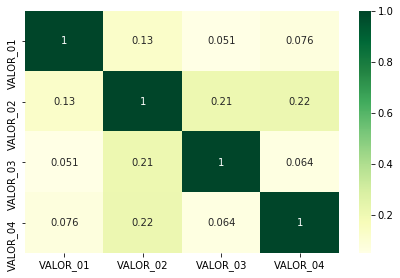

In [5]:
df_corr = df_num.corr()
sns.heatmap(df_corr, annot=True, cmap = "YlGn")
plt.tight_layout()
plt.show()

A variável Profissão possui 79 profissões distintas
Dentre elas, as mais frequentes são:


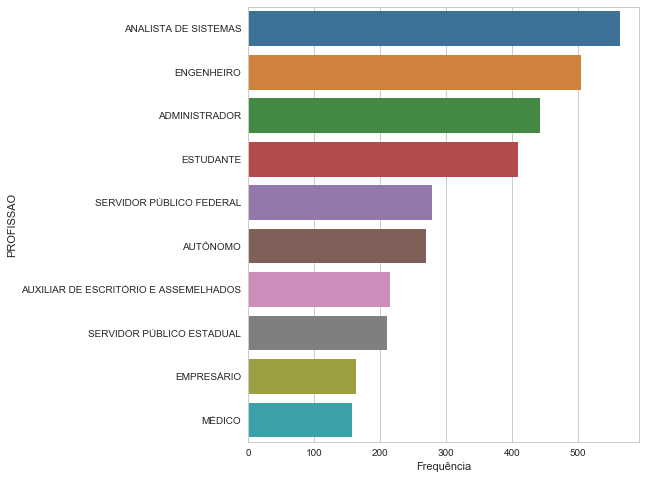

In [34]:
profi_count = df.groupby('PROFISSAO').count()['ID']
top10_profi = profi_count.sort_values(ascending=False).head(10)

print("A variável Profissão possui",df.PROFISSAO.nunique(),"profissões distintas")
print("Dentre elas, as mais frequentes são:")

#bplot_profi = [go.Bar(y=top10_profi, x=top10_profi.index.values)]
#ply.iplot(bplot_profi)

plt.figure(figsize=(7,8))
sns.barplot(x=top10_profi, y=top10_profi.index, saturation=0.6)
plt.xlabel("Frequência")
plt.show()

Classificação das profissões: [url](http://www.cofen.gov.br/wp-content/uploads/2015/12/CLASSIFICA%C3%87%C3%83O-BRASILEIRA-DE-OCUPA%C3%87%C3%95ES-MEC.pdf)

Estrutura do CBO: [CBO](http://www.mtecbo.gov.br/cbosite/pages/downloads.jsf)

In [44]:
ocup = pd.read_csv("./CBO2002 - Ocupacao.csv", sep=";",encoding = "ISO-8859-1")
ocup.head()

,CODIGO,TITULO
0,10105,Oficial general da aeronáutica
1,10110,Oficial general do exército
2,10115,Oficial general da marinha
3,10205,Oficial da aeronáutica
4,10210,Oficial do exército


In [105]:
def FindJob(Job):
    """
    Função para encontrar as profissões registradas no CBO2002 que mais 
    se assimilam ao parâmetro de entrada;
    """
    print("Para a profissão",Job)
    res = process.extract(Job, ocup.TITULO, limit=3)
    print(" * Resultados similares:",  
            *['\n\t' + str(i+1) + ' - ' + res[i][0] for i in range(3)])
    return
    

FindJob("Estatístico")

Para a profissão Estatístico
 * Resultados similares: 
	1 - Estatístico 
	2 - Estatístico (estatística aplicada) 
	3 - Estatístico teórico


In [ ]:
def MatchJob(Job):
    """
    Encontra e retorna a ocupação mais similar de acordo com o agrupamento
    CBO2002.
    """
    match = process.extract(Job, ocup.TITULO, limit=1)
    return match[0][0]

# Criando uma coluna referente ao agrupamento CBO2002
df['OCUPACAO_CBO'] = df['PROFISSAO'].apply(MatchJob)

Para não ter que rodar este processo toda vez,